# 780 Calibration Analysis

![thing](780nmPolarimeter.png)



## Rectangular Instrument Matrix Method
This method models the detector as a linear system that takes a stokes vector as input and maps it to 6 voltages. By using known inputs and measuring the voltage outputs, we can find the matrix elements through a least squares fit. The left inverse of this matrix can be calculated simply and used to take voltage measurements and calculate the corresponding stokes parameters.

The matrix relationship measured voltage states from the input stokes states is written below.


$$
\left(\begin{array}{cc}
V_1\\
V_2\\
V_3\\
V_4\\
V_5\\
V_6 
\end{array}\right)
= \left(\begin{array}{cc}
b_{11} & b_{12} & b_{13} &  b_{14}\\
b_{21} & b_{22} & b_{23} &  b_{24}\\
b_{31} & b_{32} & b_{33} &  b_{34}\\
b_{41} & b_{42} & b_{43} &  b_{44}\\
b_{51} & b_{52} & b_{53} &  b_{54}\\
b_{61} & b_{62} & b_{63} &  b_{64}
\end{array}\right)
\left(\begin{array}{cc}
S_0\\
S_1\\
S_2\\
S_3
\end{array}\right)
$$

$$
\vec{V} = B\vec{S}  
$$

$$
B^{-1} \vec{V} = \vec{S}  
$$

With a linear polarization state, written in the following form, we can probe the first 3 columns of the matrix. 

$$
\vec{S_{linear}} =
\left(\begin{array}{cc}
S_0\\
S_1\\
S_2\\
S_3
\end{array}\right)=
\left(\begin{array}{cc} 
1\\
-cos(2\theta)\\
sin(2\theta)\\
0
\end{array}\right)
$$

### Modifications to this method
In writing this notebook, I realized several things that I should do differently than I did with the test data. For starters, the practical convention for the measurements was to measure angles from vertical. This means we should use the following expression for the normalized stokes vectors generated by the linear polarizer(theres a sign difference from what I used before). 
$$
\left(\begin{array}{cc} 
1\\
-cos(2\theta)\\
sin(2\theta)\\
0
\end{array}\right)
$$
In addition, we should be working with unnormalized stokes vectors. If we find our calibration matrix by using normalized input states, then the calibration matrix has a specific normalization baked into it, corresponding to the power level used for the calibration data. Therefore, we will have to renormalize by whatever S0 we get. If the input power was actually constant for the all measurements in the calibration process then this would just be an arbitrary normalization, but since the intensity varies between measurements, we need to include that information in the calibration process. Without including measurements of the total intensity in the calibration process, genuine total intensity fluctuations will appear to be polarization dependent losses in the instrument. 

To include the total intensity into the fitting process, I used non-normalized input states. For the linear states, this took the following form.
$$
\left(\begin{array}{cc} 
I(\theta)\\
-I(\theta)cos(2\theta)\\
I(\theta)sin(2\theta)\\
0
\end{array}\right)
$$
Ideally I would have measured the total intensity along with each input state, but that would have taken forever so I only measured at 30 degree intervals. To attain $I(\theta)$ for the angles where I didn't measure, I fit the intensity data to the following expresion. $I(\theta) = a + bcos(2\theta) + csin(\theta)$. The figure below shows the intensity measurements with the resulting fit. The y scale is bits. For reference, 1 bit is ~0.25uW. The vertical lines correspond to the maximum and minumum values of the intensity at -71 and 19 degrees. It looks like this power fluctuation comes from the ellipticity of the state incident on the vertical polarizer. We can see it was an ellipse with principle axes at 19 and -71 degrees from vertical.
![Measured intensities](TotalIntensityMeasurementsWithFit.png)

The following plot shows the voltage measurements on each diode after averaged for measurements corresponding to 180 degree rotations of the polarizer.
![Uncalibrated Data](UncalibratedDataAveraged.png)

This plot shows the Stoke Parameters we get before calibrating. There are several things to notice. The DOP seems to vary with a 90 degree period. This is expected since we have now accounted for the different losses along each path; the calculated total intensity is going to change as a function of the angle. All of the individual voltages vary as $2\theta$ so we could expect a similar dependency in the total intensity. Since the DOP invloves the quadrature sum of the stokes parameters, it is going to have $4\theta$ dependence if the stokes params have $2\theta$ dependence. S1 seem relatively well behaved in this plot, reaching predictable maxs and mins. 0 degrees corresponds to vertical polarization so S1 should be -1. With S2 and S3, there is weird behavior. S3 has behavior similar to that we expect of S1 and S2 looks more like an uncalibrated S3: small angle variation.

![Uncalibrated Stokes Params](UncalibratedStokesParams.png)

## Results
The results of fitting the input linear state expression to the detector voltages is shown below. 

![Voltages with fit](FittingtoVoltages.png)

This is the fitted instrument matrix.
$$
B = \left(\begin{array}{cc}
0.15870841 & -0.15801008 & -0.00424959 &  0.00289328\\
0.15728744 &  0.16203815 & -0.00587439 &  0.00355198\\
0.11785667 &  0.01950251 &  0.02979942 & -0.12128622\\
0.12388812 &  0.00566433 & -0.0412087 &  0.12705745\\
0.12899912 & -0.00755085 & -0.11606577 & -0.06386057\\
0.12401609 &  0.01390201 &  0.10633279 &  0.06933571
\end{array}\right)
$$

This is the calibration matrix calculated from the left inverse of the instrument matrix.
$$
B^{-1}=\left(\begin{array}{cc}
1.56907639 &  1.28862549 & 1.23188093 &  0.92826455 &  1.02016584 & 1.26195684\\
-3.1915938 &  3.03172338 &  0.17673249 &  0.13756124 & -0.05149058 & -0.0124847\\
0.43543239 & -0.2572283 &  2.03530841 & -2.08707662 & -3.80384367 & 3.87638254\\
-0.10986847 &  0.04214099 & -3.43967392 &  3.43966045 & -1.11414269 &1.07879286
\end{array}\right)
$$

The bottom right 4x4 matrix is interesting to consider.
$$
\left(\begin{array}{cc}
2.03530841 & -2.08707662 & -3.80384367 & 3.87638254\\
-3.43967392 &  3.43966045 & -1.11414269 &1.07879286
\end{array}\right)
$$
This matrix contains the coupling between V3 to V6 and S2/S3. Ideally, we expect $S2 = V3 - V4$ and $S3 = V6-V5$. Looking at this matrix in terms of these expressions, it really looks like it can be represented by a 2x2 matrix that operates on S2 and S3.
$$
\left(\begin{array}{cc}
2 & 3.8\\
-3.4 & -1.1
\end{array}\right)
$$
I compared this matrix to a rotation matrix to get an intuition for transformation that is being applied to get from whatever stokes basis we are measuring w.r.t to get to the standard basis. I rewrote this matrix and the rotation matrix as vectors and took the dot product between them. I found that this dot product was maximized for a rotation angle of ~62 degrees. Since the dot product maximizes for colinear vectors, I interpreted this to mean that the calibration process was applying a rotation in the S2/S3 plane of ~60 degrees to turn the Poincare Sphere we measure into the one we want. I'm not sure why this is the case. As a rotation greater that 45 degrees, it is suggesting the S2 measurement we designed is doing a better job at measuring S3 and vice versa.


Using the calibration matrix, the measured voltage states are transformed and plotted against the stokes parameters of the input state.
![Calibrated Stokes Params](CalibratedStokesRectInstrMatrix.png)
The degree of polarization is displayed in the following plot. I think DOP is a metric for how well the calibration accounted for losses along each path to each detector. Equivalently, it tells us how well the total intensity is measured.
![Calibrated DOP](CalibratedStokesRectInstrMatrixDOP.png)

The following plot shows the angle, in degrees, between the input and calibrated polarization states. 
![Calibrated Angle Difference](CalibratedStokesRectInstrMatrixngleDiff.png)


## Correcting for finite extinction ratio
I measured an extinction ratio of 18,000:1 for the Edmund Optics film polarizers. Since the state incident on the polarizer is right hand circular, there is come circularity in our linear input states. Therefore, our input states are more accurately described with the following form.
$$
I(\theta)\left(\begin{array}{cc} 
1\\
-cos(2\theta)\\
sin(2\theta)\\
\epsilon
\end{array}\right)
$$
Therefore, the new equations to fit should be:
$$ V_i = I(\theta)(b_{i1} - b_{i2}cos(2\theta) + b_{i3}sin(2\theta) + b_{i4}\epsilon) $$
For each $V_i$, $b_{i4}\epsilon$ is simply a constant, like $b_{i1}$ so it doesn't represent an additional degree in the fitting process. Therefore, we can interpret the values of $b_{i1}$ that we found as including an additive factor of $b_{i4}\epsilon$ that it shouldn't. We can use the extinction ratio of the polarizer as an estimate for $\epsilon$. This gives us a value of $1/18,000$. Given that $|b_{i4}|$ < 1, this $b_{i4}\epsilon$ term is negligible compared to the values found for $b_{i1}$: $b_{i4}\epsilon \leqslant \sim 6*10^{-6}$. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as ss
import numpy as np

In [2]:
vertical = 71 #angle on polarizer that corresponds to vertical polarization

In [3]:
df = pd.read_csv("780LinearTrialCombined.csv")
display(df)
dfIntensity = pd.read_csv("780LinearTrial1Intensity6:28:15:53:38.csv")
display(dfIntensity)

,Unnamed: 0,Angle,V1,V2,V3,V4,V5,V6
0,0,0,10.387,95.032,40.040,50.825,63.125,22.127
1,1,5,16.915,87.860,37.076,51.932,67.349,17.014
2,2,10,25.008,80.199,35.077,53.083,72.326,12.622
3,3,15,33.094,72.672,33.156,54.157,76.050,9.024
4,4,20,42.652,64.008,32.005,55.025,78.930,6.975
...,...,...,...,...,...,...,...,...
67,7,335,0.692,100.957,50.031,38.730,30.104,52.005
68,8,340,0.031,102.565,48.342,41.015,36.700,46.035
69,9,345,0.033,103.113,46.398,43.978,43.882,40.002
70,10,350,2.022,101.740,44.464,46.113,50.365,33.883


,Unnamed: 0,Angle,V1,V2,V3,V4,V5,V6
0,0,0.0,313.952,0.026,0.019,0.025,0.019,0.025
1,1,30.0,312.610,0.025,0.013,0.020,0.022,0.026
2,2,60.0,295.905,0.027,0.025,0.024,0.018,0.036
3,3,90.0,281.061,0.032,0.019,0.023,0.023,0.025
4,4,120.0,284.068,0.028,0.013,0.024,0.018,0.031
5,5,150.0,299.933,0.024,0.021,0.033,0.019,0.038
6,6,180.0,307.646,0.040,0.017,0.019,0.018,0.036
7,7,210.0,297.077,0.025,0.008,0.023,0.028,0.039
8,8,240.0,283.532,0.031,0.019,0.022,0.020,0.034
9,9,270.0,281.322,0.029,0.019,0.024,0.021,0.031


In [4]:
#This method averages each voltage measurement with the one an angle 180 more or less. Polarization states are symmetric under 180 rotations.
def average180():
    avgArr = []
    for angle in np.arange(0,180,5):
        cur1df = df.loc[df['Angle'] == angle]
        cur2df = df.loc[df['Angle'] == angle+ 180]
        curdf= cur1df.append(cur2df)
        meandf = curdf.mean()
        meanArr = meandf.to_numpy()
        meanArr[1] = meanArr[1]-90
        avgArr.append(meanArr)
        avgDF = pd.DataFrame(avgArr, columns = ['index', 'Angle', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
    avgArr = np.array(avgArr)
    return avgArr, avgDF

Text(0.5, 0, 'Angle')

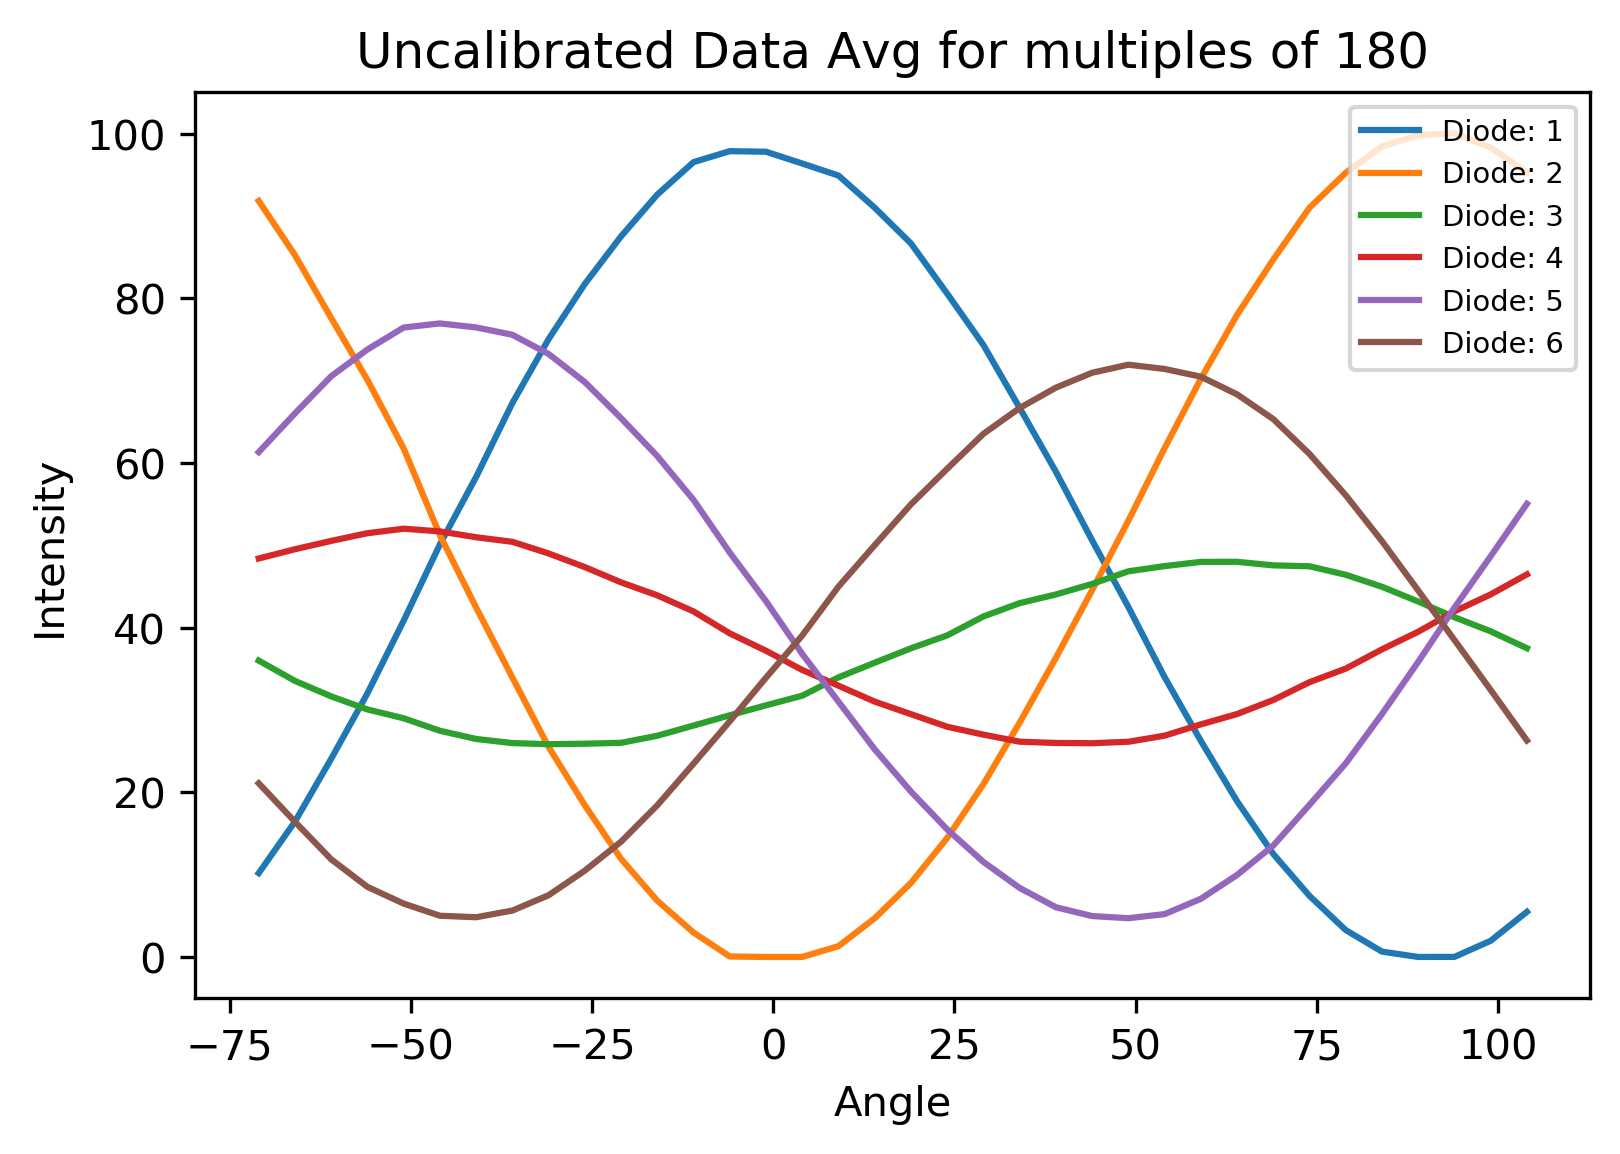

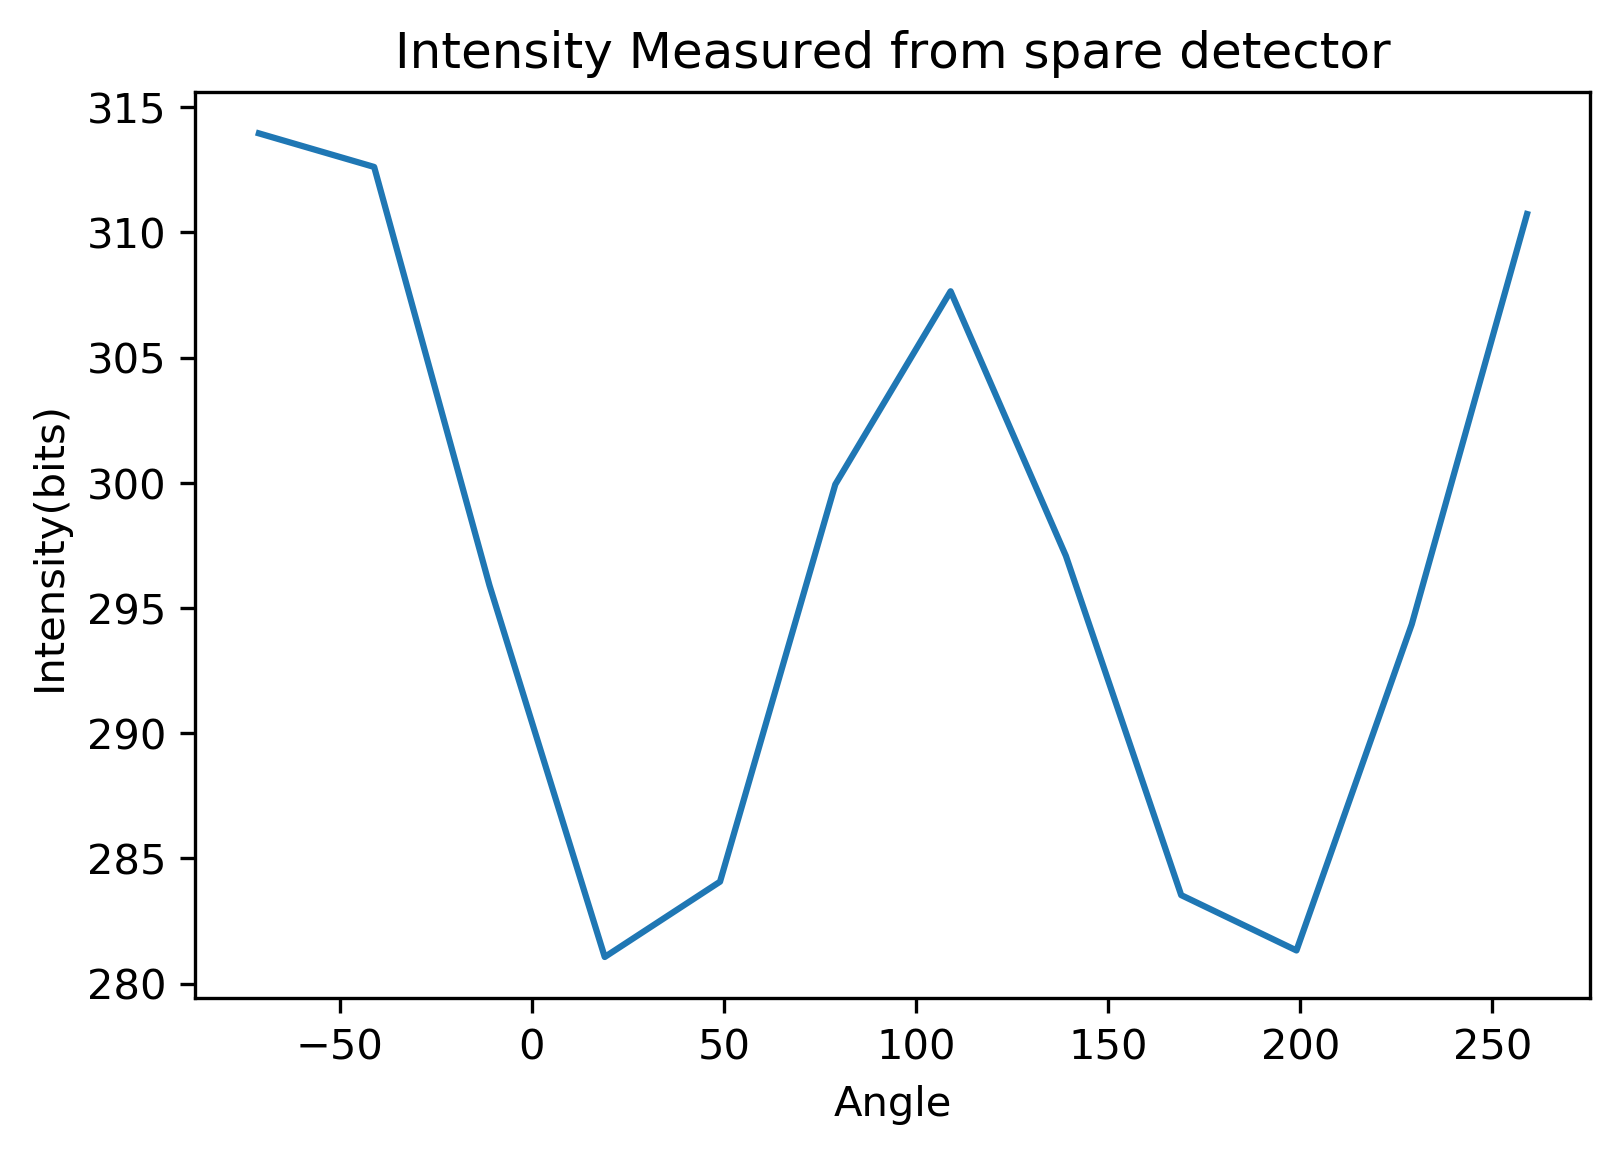

In [5]:
plt.figure(dpi=300)
avgArr, avgDF = average180()
x = avgArr[:,1]
vStateArr = avgArr[:,2:]
for i in np.arange(1,7,1):
    plt.plot(x-vertical,avgArr[:,1+i] , label = "Diode: {0}".format(i))

plt.title("Uncalibrated Data Avg for multiples of 180")
plt.ylabel("Intensity")
plt.xlabel("Angle")
#plt.legend(bbox_to_anchor=(1.1, 1))
plt.legend(fontsize = "x-small")
#plt.savefig("UncalibratedDataAveraged.png", bbox_inches='tight')

plt.figure(dpi=300)
intensityArr = dfIntensity.to_numpy()
x = intensityArr[:,1]
intensity = intensityArr[:,2]
plt.plot(x-vertical,intensity)
plt.title("Intensity Measured from spare detector")
plt.ylabel("Intensity(bits)")
plt.xlabel("Angle")
#plt.savefig("TotalIntensityMeasurements.png", bbox_inches='tight')


In [6]:
def calcStokes(vState):
    if np.shape(vState) != (6,):
        pStateArr = []
        for curState in vState:
            curpState = calcStokes(curState)
            pStateArr.append(curpState)
        pStateResult = pStateArr
    else:
        V1, V2, V3, V4, V5, V6 = vState
        S1 = V2 - V1
        S2 = V3 - V4
        S3 = V6 - V5
        S0 = (V1 + V2 + V3 + V4 + V5 + V6)/3
        DOP = (S1**2 + S2**2 + S3**2)**0.5/S0
        S1 = S1/S0
        S2 = S2/S0
        S3 = S3/S0
        pStateResult =DOP,  1, S1, S2, S3
    return pStateResult

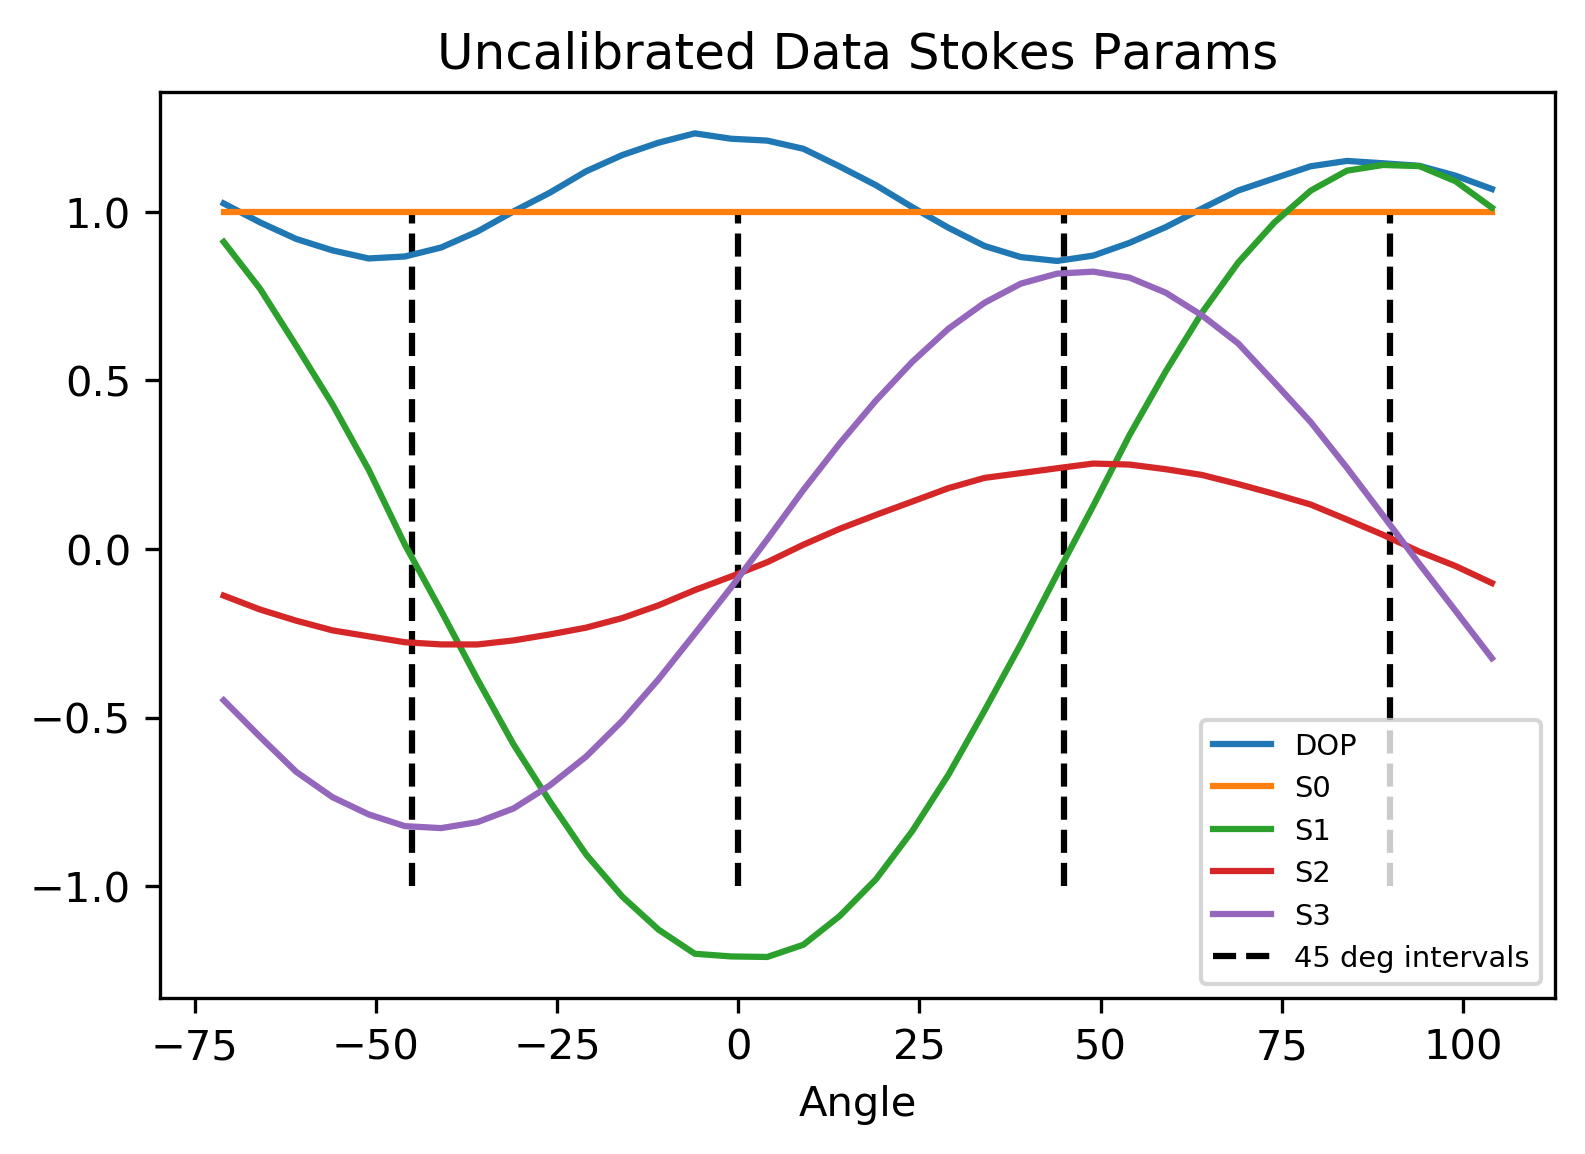

In [7]:
plt.figure(dpi=300)
x = avgArr[:,1]
z = x - vertical
pStateArr = calcStokes(vStateArr)
pStateArr = np.array(pStateArr)
labelArr = ["DOP","S0", "S1", "S2", "S3"]
for i in np.arange(0,5,1):
    plt.plot(z,pStateArr[:,i] , label = labelArr[i])
plt.vlines([-45,0, 45, 90],-1, 1,linestyles='dashed', label = '45 deg intervals')
plt.title("Uncalibrated Data Stokes Params")
plt.xlabel("Angle")
plt.legend(fontsize='x-small')
#plt.savefig("UncalibratedStokesParams.png",bbox_inches='tight')

62.44897959183674
[0.4625382902408352, 0.8865993063730001, -0.8865993063730001, 0.4625382902408352]


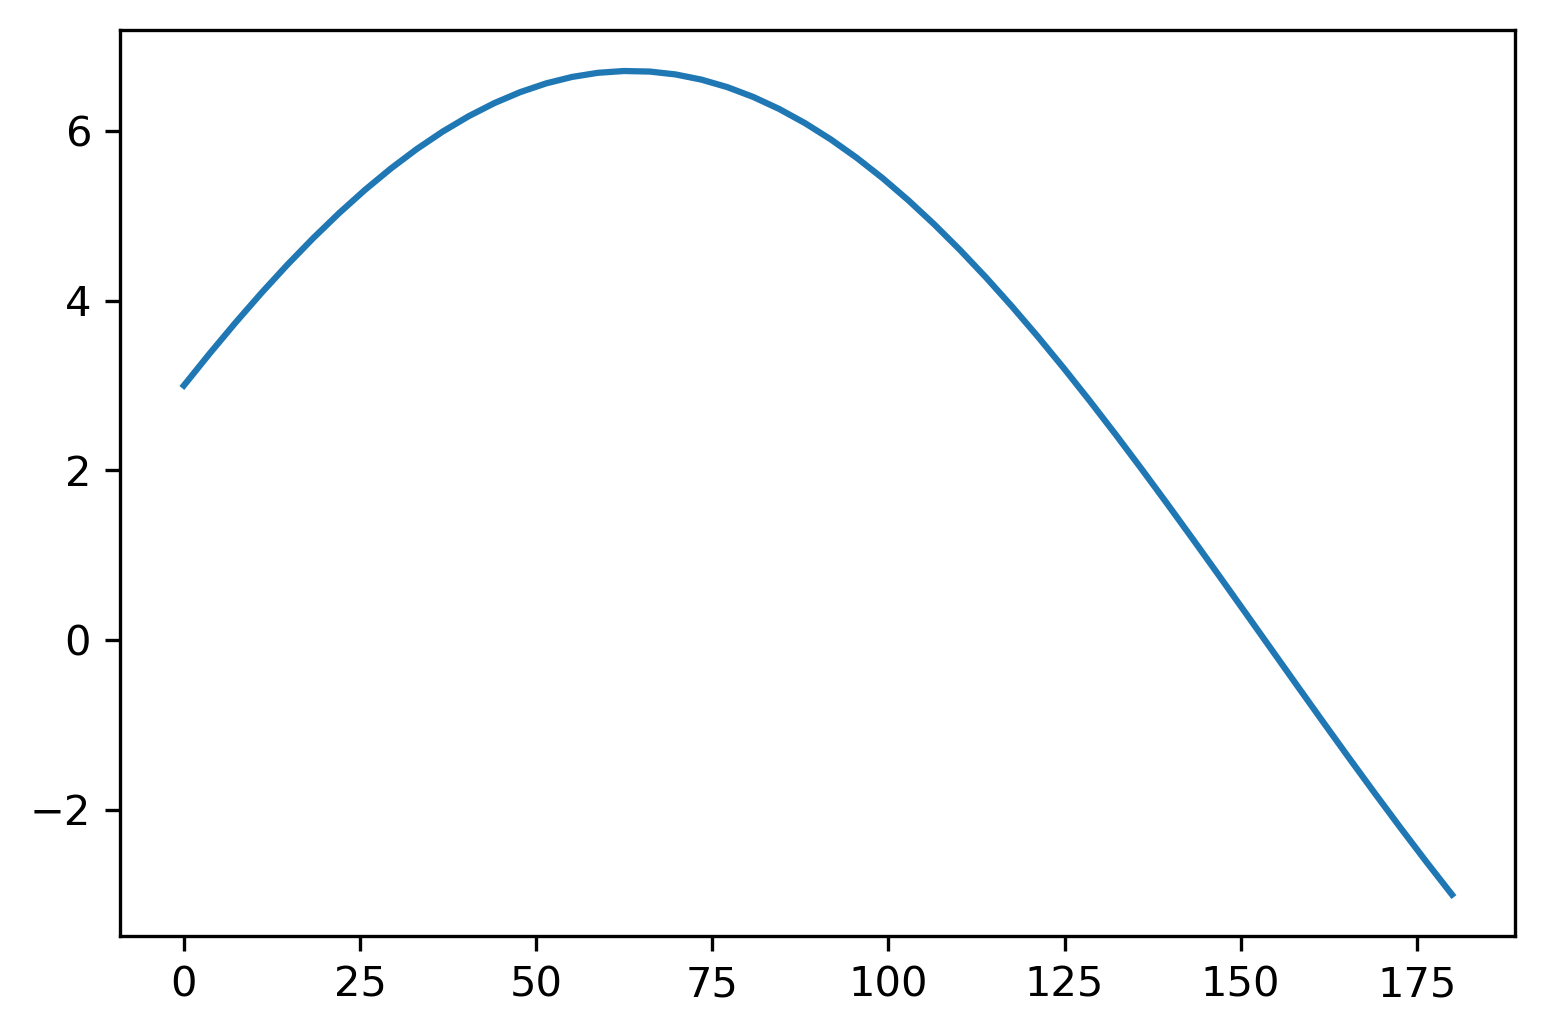

In [8]:
#Brief calculation to see what rotation the calibration matrix is doing in the S2, S3 plane of the Poincare Sphere
subVect = [2, 3, -3, 1]
x = np.linspace(0,180)
z = x*np.pi/180
rotVect = [np.cos(z), np.sin(z), -np.sin(z), np.cos(z)]
y = np.dot(subVect, rotVect)
plt.figure(dpi=300)
plt.plot(x,y)
print(x[np.argmax(np.abs(y))])
z = x[np.argmax(np.abs(y))]*np.pi/180
print([np.cos(z), np.sin(z), -np.sin(z), np.cos(z)])

In [9]:
def intensityFit(x, a,b,c):
    x = x - vertical #redefine the angle in terms of polarizer vertical
    x = x*np.pi/180
    return a - b*np.cos(2*x) - c*np.sin(2*x)

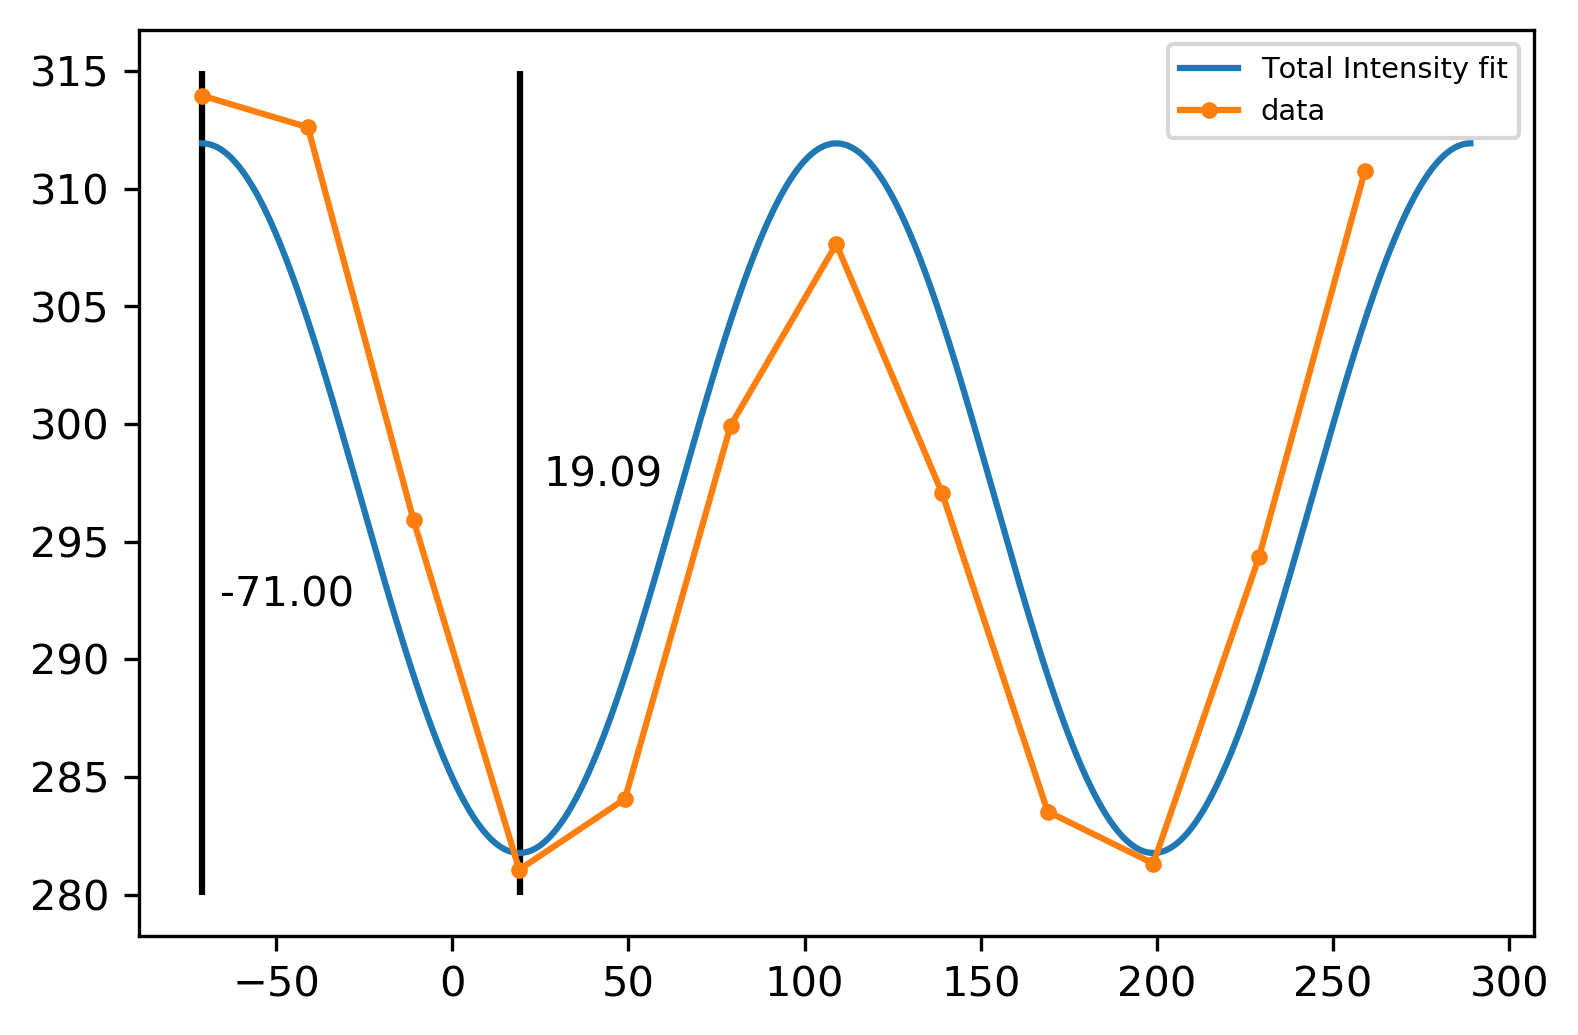

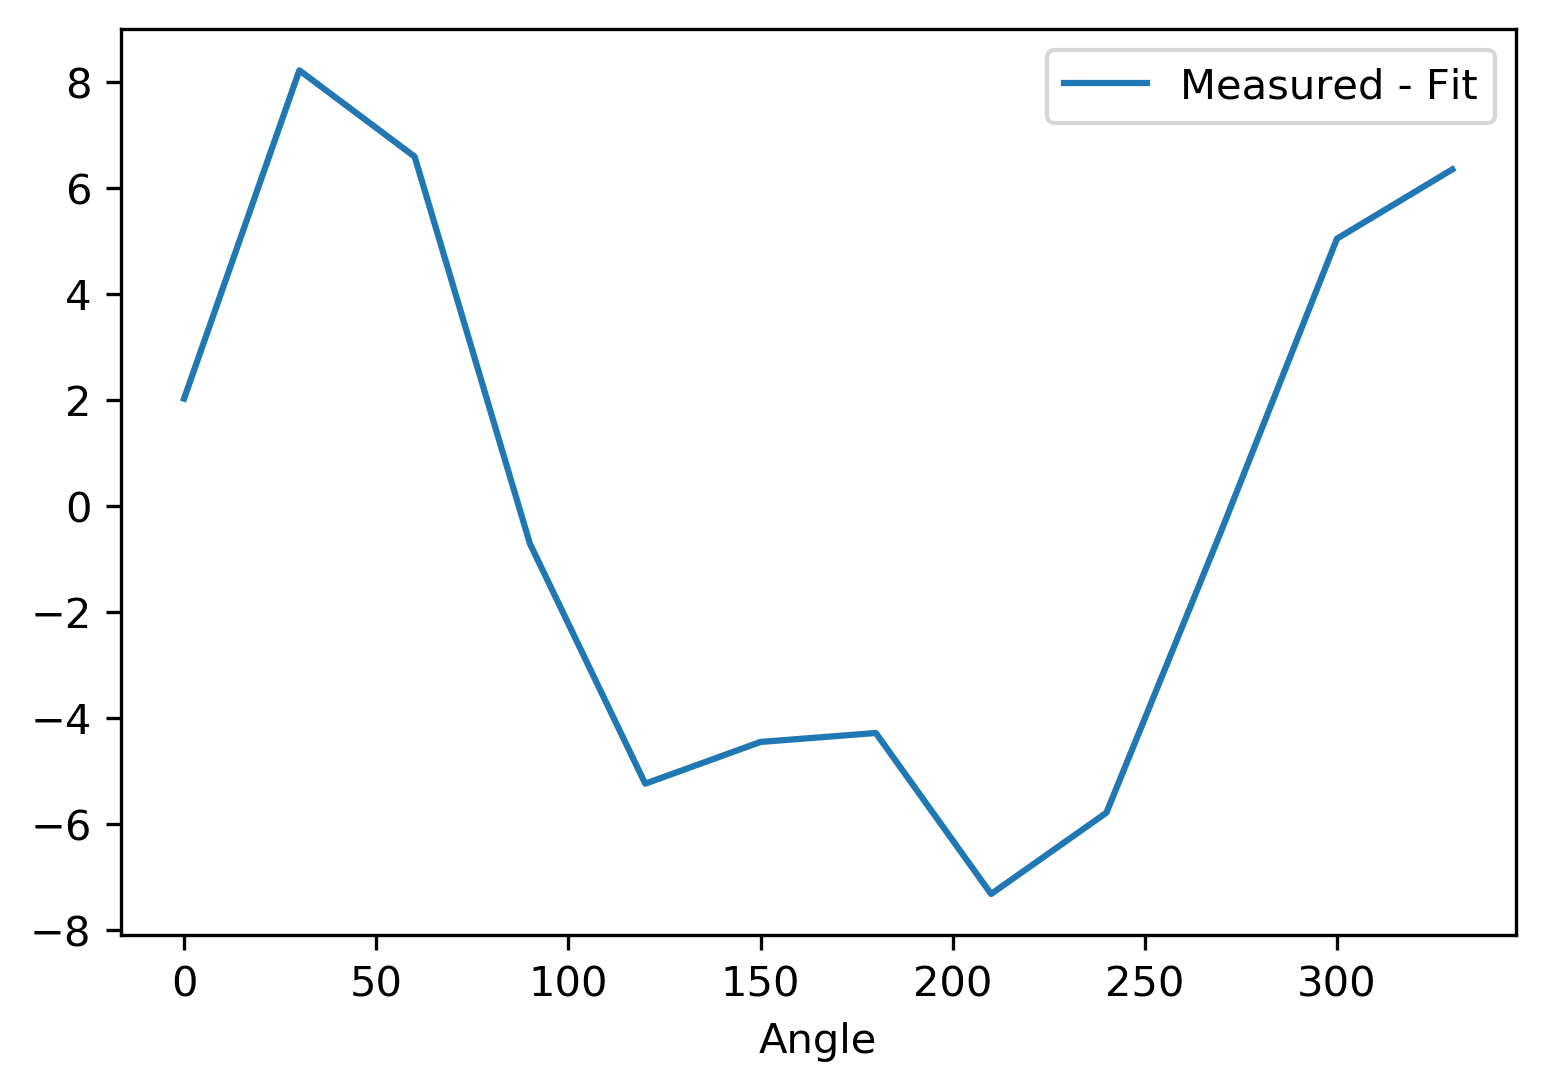

In [18]:
#Intensity fitting
intensityArr = dfIntensity.to_numpy()
x = intensityArr[:,1]
intensity = intensityArr[:,2]
params = ss.curve_fit(intensityFit, x, intensity)
Iparams = params[0]
#print(Iparams)
a,b,c = Iparams
plt.figure(dpi=300)
z = np.linspace(0,360,1000)
plt.plot(z-vertical,intensityFit(z,a,b,c), label="Total Intensity fit")
plt.plot(x-vertical, intensity,marker='.', label = "data")
plt.vlines([z[np.argmin(intensityFit(z,a,b,c))]-vertical, z[np.argmax(intensityFit(z,a,b,c))]-vertical], 280,315)
plt.figtext(0.35,.5, "{0:.2f}".format(z[np.argmin(intensityFit(z,a,b,c))]-vertical))
plt.figtext(0.17,.4, "{0:.2f}".format(z[np.argmax(intensityFit(z,a,b,c))]-vertical))
plt.legend(loc=1, fontsize='x-small')
#plt.savefig("TotalIntensityMeasurementsWithFit.png", bbox_inches='tight')

plt.figure(dpi = 300)
plt.plot(x, intensity - intensityFit(x,a,b,c), label = "Measured - Fit")
plt.xlabel("Angle")
plt.legend()

In [19]:
#### This is the functional form the voltages should have with a linear state input at angle x 
# where x is angle measured from vertical
def linStateFit(x, a,b,c):
    x = x - vertical #redefine the angle in terms of polarizer vertical
    x = x*np.pi/180
    I = intensityFit(x,Iparams[0], Iparams[1], Iparams[2])
    return I*(a - b*np.cos(2*x) + c*np.sin(2*x))

[array([ 0.15870841, -0.15801008, -0.00424959]), array([ 0.15728744,  0.16203815, -0.00587439]), array([0.11785667, 0.01950251, 0.02979942]), array([ 0.12388812,  0.00566433, -0.0412087 ]), array([ 0.12899912, -0.00755085, -0.11606577]), array([0.12401609, 0.01390201, 0.10633279])]
------------------------------------------------------
[array([2.35182610e-07, 4.70370118e-07, 4.70360409e-07]), array([2.44265539e-07, 4.88536167e-07, 4.88525953e-07]), array([2.76745111e-08, 5.53495974e-08, 5.53484428e-08]), array([1.69650368e-08, 3.39304288e-08, 3.39297197e-08]), array([1.26440719e-07, 2.52884044e-07, 2.52878801e-07]), array([1.78648979e-07, 3.57301689e-07, 3.57294233e-07])]
------------------------------------------------------
[array([ 1.48185346e-06, -2.97683618e-06, -1.10683644e-04]), array([ 1.55298817e-06,  3.01494529e-06, -8.31619180e-05]), array([2.34814985e-07, 2.83807542e-06, 1.85736636e-06]), array([ 1.36938371e-07,  5.99018833e-06, -8.23363018e-07]), array([ 9.80167327e-07, -3

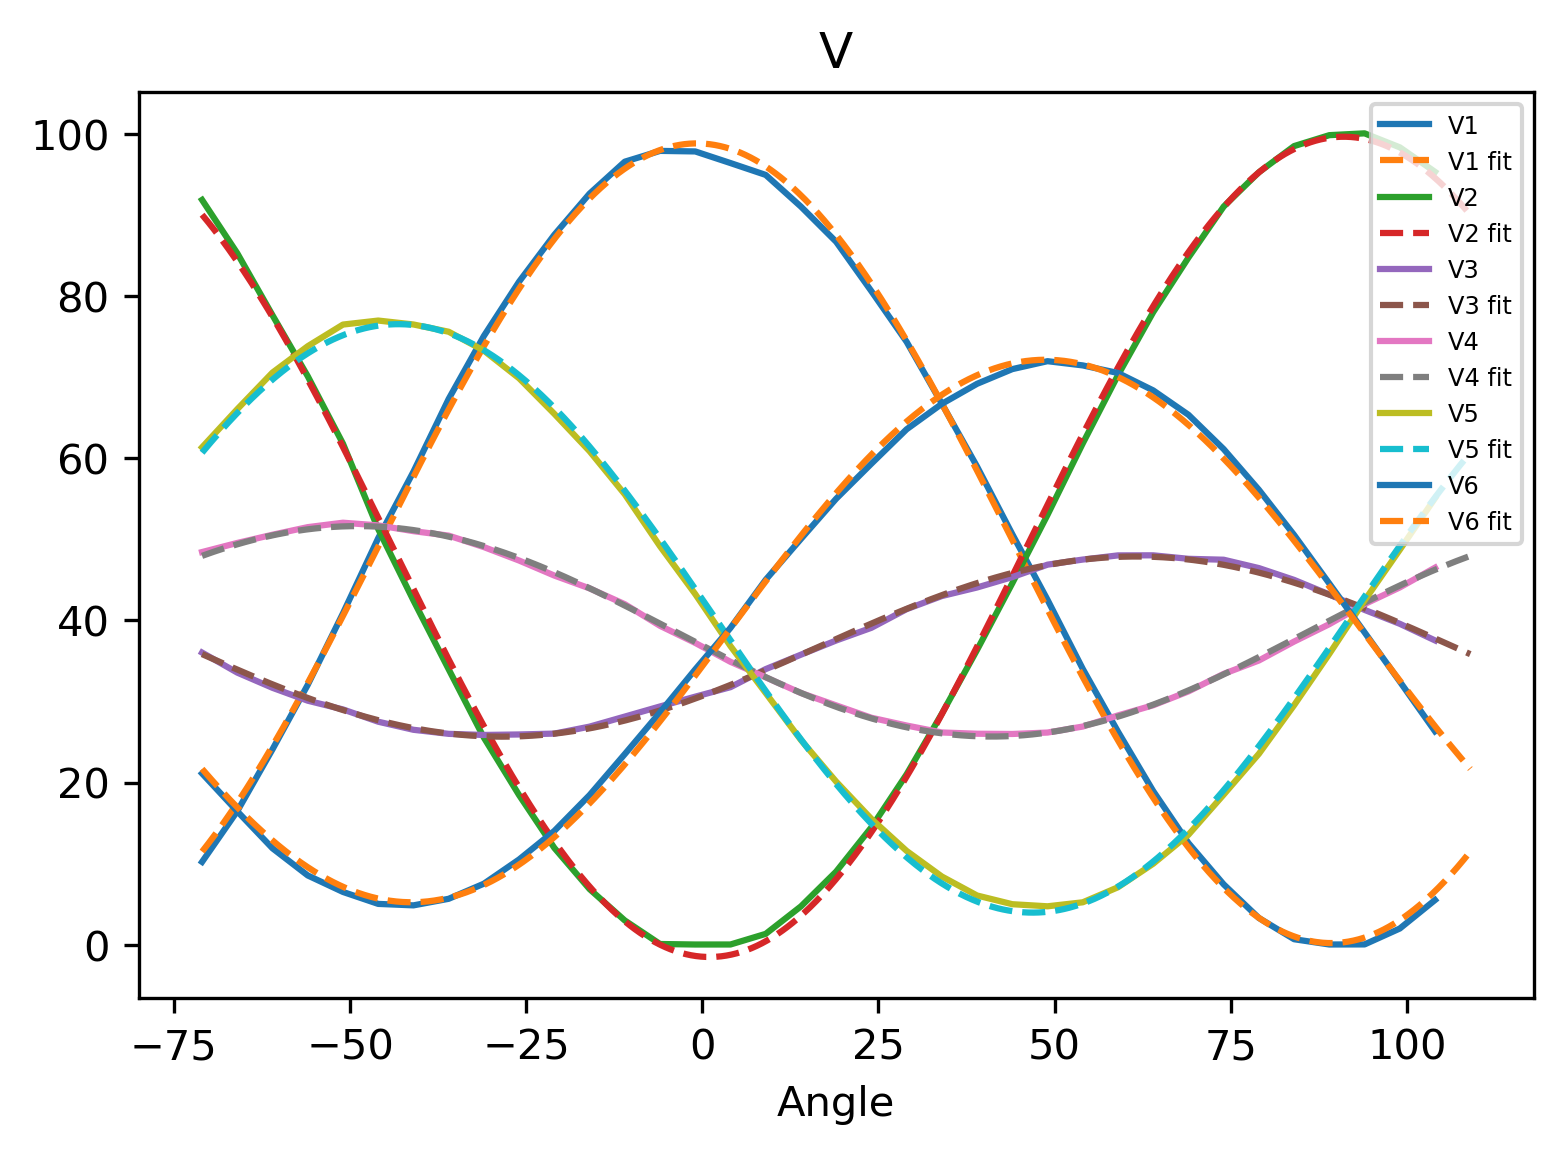

In [20]:
#V fitting
avgArr, avgDF = average180()
x = avgArr[:,1]
vStateArr = avgArr[:,2:]
vStateArr = np.array(vStateArr)
ParamsArr = []
sigmaArr = []
divArr = []
plt.figure(dpi=300)
z = np.linspace(0,180,1000)
for i in np.arange(0,6,1):
    y = vStateArr[:,i]
    params = ss.curve_fit(linStateFit, x, y)
    ParamsArr.append(params[0])
    sigmaArr.append(np.diagonal(params[1]))
    divArr.append(np.diagonal(params[1]/params[0]))
    a,b,c = params[0]
    plt.plot(x-vertical, y, label="V{0}".format(i+1))
    plt.plot(z-vertical,linStateFit(z,a,b,c), '--',label="V{0} fit".format(i+1))

plt.title("V")
#plt.text(50,.63, "y = {0:.3} + {1:.3}sin(2x)+ {2:.3}cos(2x)".format(a,b,c))
plt.xlabel("Angle")
#plt.legend(bbox_to_anchor=(1.1, 1))
plt.legend(fontsize='xx-small')
#plt.savefig("FittingtoVoltages.png", bbox_inches='tight')
print(ParamsArr)
print("------------------------------------------------------")
print(sigmaArr)
print("------------------------------------------------------")
print(divArr)

In [21]:
#Read in Circular States and do the averaging
#read in diode measurements and total intensity for first left handed circular state
dfLH1 = pd.read_csv("780LHCircular1WP6:28:18:24:1.csv")
dfLH1I = pd.read_csv("780LHCircular1WPIntensity6:28:18:22:51.csv")
#read in diode measurements and total intensity for second left handed circular state
dfLH2 = pd.read_csv("780LHCircular2WP6:28:18:41:46.csv")
dfLH2I = pd.read_csv("780LHCircular2WPIntensity6:28:18:43:28.csv")
#display(dfLH1)
dfLH = pd.concat([dfLH1, dfLH2], ignore_index = True)
dfLHI = pd.concat([dfLH1I, dfLH2I], ignore_index= True)
LH = np.mean(dfLH.to_numpy(), axis = 0)[2:]
LHI = np.mean(dfLHI.to_numpy(), axis = 0)[2]


dfRH1 = pd.read_csv("780RHCircular1WP6:28:18:52:23.csv")
dfRH1I = pd.read_csv("780RHCircular1WPIntensity6:28:18:51:27.csv")
#read in diode measurements and total intensity for second left handed circular state
dfRH2 = pd.read_csv("780RHCircular2WP6:28:18:53:50.csv")
dfRH2I = pd.read_csv("780RHCircular2WPIntensity6:28:18:55:21.csv")

dfRH = pd.concat([dfRH1, dfRH2], ignore_index = True)
dfRHI = pd.concat([dfRH1I, dfRH2I], ignore_index= True)
RH = np.mean(dfRH.to_numpy(), axis = 0)[2:]
RHI = np.mean(dfRHI.to_numpy(), axis = 0)[2]


lastCol = 1/2*(LH/LHI - RH/RHI)
#print(lastCol)
lastCol = np.array(lastCol)
lastCol = np.transpose([lastCol])
instrumentArr = np.append(ParamsArr,lastCol, axis = 1)
B = np.matrix(instrumentArr)
display(B)
Bdagger = B.H

Binv = np.linalg.inv(np.matmul(Bdagger,B))
Binv = np.matmul(Binv, Bdagger)
display(Binv)

matrix([[ 0.15870841, -0.15801008, -0.00424959,  0.00289328],
        [ 0.15728744,  0.16203815, -0.00587439,  0.00355198],
        [ 0.11785667,  0.01950251,  0.02979942, -0.12128622],
        [ 0.12388812,  0.00566433, -0.0412087 ,  0.12705745],
        [ 0.12899912, -0.00755085, -0.11606577, -0.06386057],
        [ 0.12401609,  0.01390201,  0.10633279,  0.06933571]])

matrix([[ 1.56907639,  1.28862549,  1.23188093,  0.92826455,  1.02016584,
          1.26195684],
        [-3.1915938 ,  3.03172338,  0.17673249,  0.13756124, -0.05149058,
         -0.0124847 ],
        [ 0.43543239, -0.2572283 ,  2.03530841, -2.08707662, -3.80384367,
          3.87638254],
        [-0.10986847,  0.04214099, -3.43967392,  3.43966045, -1.11414269,
          1.07879286]])

In [292]:
epsilon = 1/18000
Badj = np.matrix([[ 0.15870841 - epsilon, -0.15801008, -0.00424959,  0.00289328],
        [ 0.15728744 - epsilon,  0.16203815, -0.00587439,  0.00355198],
        [ 0.11785667 -epsilon,  0.01950251,  0.02979942, -0.12128622],
        [ 0.12388812 - epsilon,  0.00566433, -0.0412087 ,  0.12705745],
        [ 0.12899912 - epsilon, -0.00755085, -0.11606577, -0.06386057],
        [ 0.12401609 - epsilon,  0.01390201,  0.10633279,  0.06933571]])
Binvadj = np.linalg.inv(np.matmul(Bdagger,B))
Binvadj = np.matmul(Binvadj, Bdagger)
print(epsilon)
display(Badj)
display(Binvadj)

display(Binvadj-Binv)

5.555555555555556e-05


matrix([[ 0.15865285, -0.15801008, -0.00424959,  0.00289328],
        [ 0.15723188,  0.16203815, -0.00587439,  0.00355198],
        [ 0.11780111,  0.01950251,  0.02979942, -0.12128622],
        [ 0.12383256,  0.00566433, -0.0412087 ,  0.12705745],
        [ 0.12894356, -0.00755085, -0.11606577, -0.06386057],
        [ 0.12396053,  0.01390201,  0.10633279,  0.06933571]])

matrix([[ 1.56907639,  1.28862549,  1.23188093,  0.92826455,  1.02016584,
          1.26195684],
        [-3.1915938 ,  3.03172338,  0.17673249,  0.13756124, -0.05149058,
         -0.0124847 ],
        [ 0.43543239, -0.2572283 ,  2.03530841, -2.08707662, -3.80384367,
          3.87638254],
        [-0.10986847,  0.04214099, -3.43967392,  3.43966045, -1.11414269,
          1.07879286]])

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [26]:

fig = plt.figure(dpi=300)
#ax = fig.gca(projection='3d')
#ax.set_aspect("auto")
mappedLState = np.matmul(Binv,LH)
mappedRState = np.matmul(Binv,RH)
normL = mappedLState/mappedLState[0,0]
normR = mappedRState/mappedRState[0,0]
normL = (np.asarray(normL).flatten())
normR = (np.asarray(normR)).flatten()

# # draw sphere
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)
# ax.plot_wireframe(x, y, z, linewidths = 1, zorder = 2,color="grey", rcount = 10, ccount = 10)
# ax.set_xlabel("S1", fontsize = 15)
# ax.set_ylabel("S2", fontsize = 15)
# ax.set_zlabel("S3", fontsize = 15)
# S0, S1, S2, S3 = normL
# ax.scatter(S1, S2, S3)
# S0, S1, S2, S3 = normR
# ax.scatter(S1,S2,S3)
# plt.show()

print(normL)
print(normR)

[ 1.         -0.01906088  0.0473286   0.9326003 ]
[ 1.         -0.01906088  0.0473286  -0.97076246]


<Figure size 1800x1200 with 0 Axes>

In [237]:
def getDOP(pState):
    if np.shape(pState) != (4,):
        DOPArr = []
        for curState in pState:
            curDOP = getDOP(curState)
            DOPArr.append(curDOP)
        Result = DOPArr
    else:
        S0, S1, S2, S3 = pState
        DOP = (S1**2 + S2**2 + S3**2)**0.5/S0
        Result = DOP
    return Result

In [238]:
def angleToStokes(angle):
    if np.shape(angle) != ():
        StateArr = []
        for x in angle:
            curState = angleToStokes(x)
            StateArr.append(curState)
        state = StateArr
    else:
        angle = angle - vertical
        S0 = 1
        S1 = -np.cos(2*angle *np.pi/180)
        S2 = np.sin(2*angle *np.pi/180)
        S3= 0 
        state = S0, S1, S2, S3
    return np.array(state)

In [239]:
def cost(pState, controlState):
    if np.ndim(pState) != 1:
        return np.linalg.norm(np.subtract(pState, controlState), axis = 1)
    else:
        return np.linalg.norm(np.subtract(pState, controlState))
    #Distance b/w mapped state and control state in Stokes Space
    
def angleDiff(pState, controlState):
    if np.ndim(pState) != 1:
        angleArr = []
        for i in np.arange(0,len(pState),1):
            curpState = pState[i]
            curcontrolState = controlState[i]
            angleArr.append(angleDiff(curpState, curcontrolState))
       
        result = angleArr
    else:
        Dot = np.dot(pState, controlState)
        A = np.linalg.norm(pState)
        B = np.linalg.norm(controlState)
        result = np.arccos(Dot/(A*B))*180/np.pi
    
    return result
        

In [240]:
def normalize(pState):
    if np.ndim(pState) !=1:
        stateArr = []
        for i in np.arange(0,len(pState),1):
            curpState = pState[i]
            stateArr.append(normalize(curpState))
        result = stateArr
    else:
        S0, S1, S2, S3 = pState
        result = [1, S1/S0, S2/S0, S3/S0]
    return np.array(result)

[-5.29641594e-04  3.05994163e-03 -7.14721431e-04  1.08187320e-04
 -2.77799785e-03 -1.26608992e-03 -1.11660877e-03  3.11377066e-05
 -3.16277529e-03 -2.90798199e-03  3.95673701e-04  2.74759079e-03
  2.12401821e-03 -1.22398011e-03  1.60296820e-03  4.14894875e-03
  3.61653558e-04 -6.53036166e-04  8.12479017e-04  9.89229560e-04
 -3.12057243e-03 -4.56441369e-03  2.80898439e-03  2.52412492e-03
 -4.16410839e-03 -2.32523874e-03  1.12453600e-03  7.04383468e-04
  4.29152805e-03 -2.58512194e-04 -4.00084437e-03 -1.50353312e-03
 -1.01145696e-03  2.95596801e-03  3.32797418e-04  4.23939062e-03]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175.]


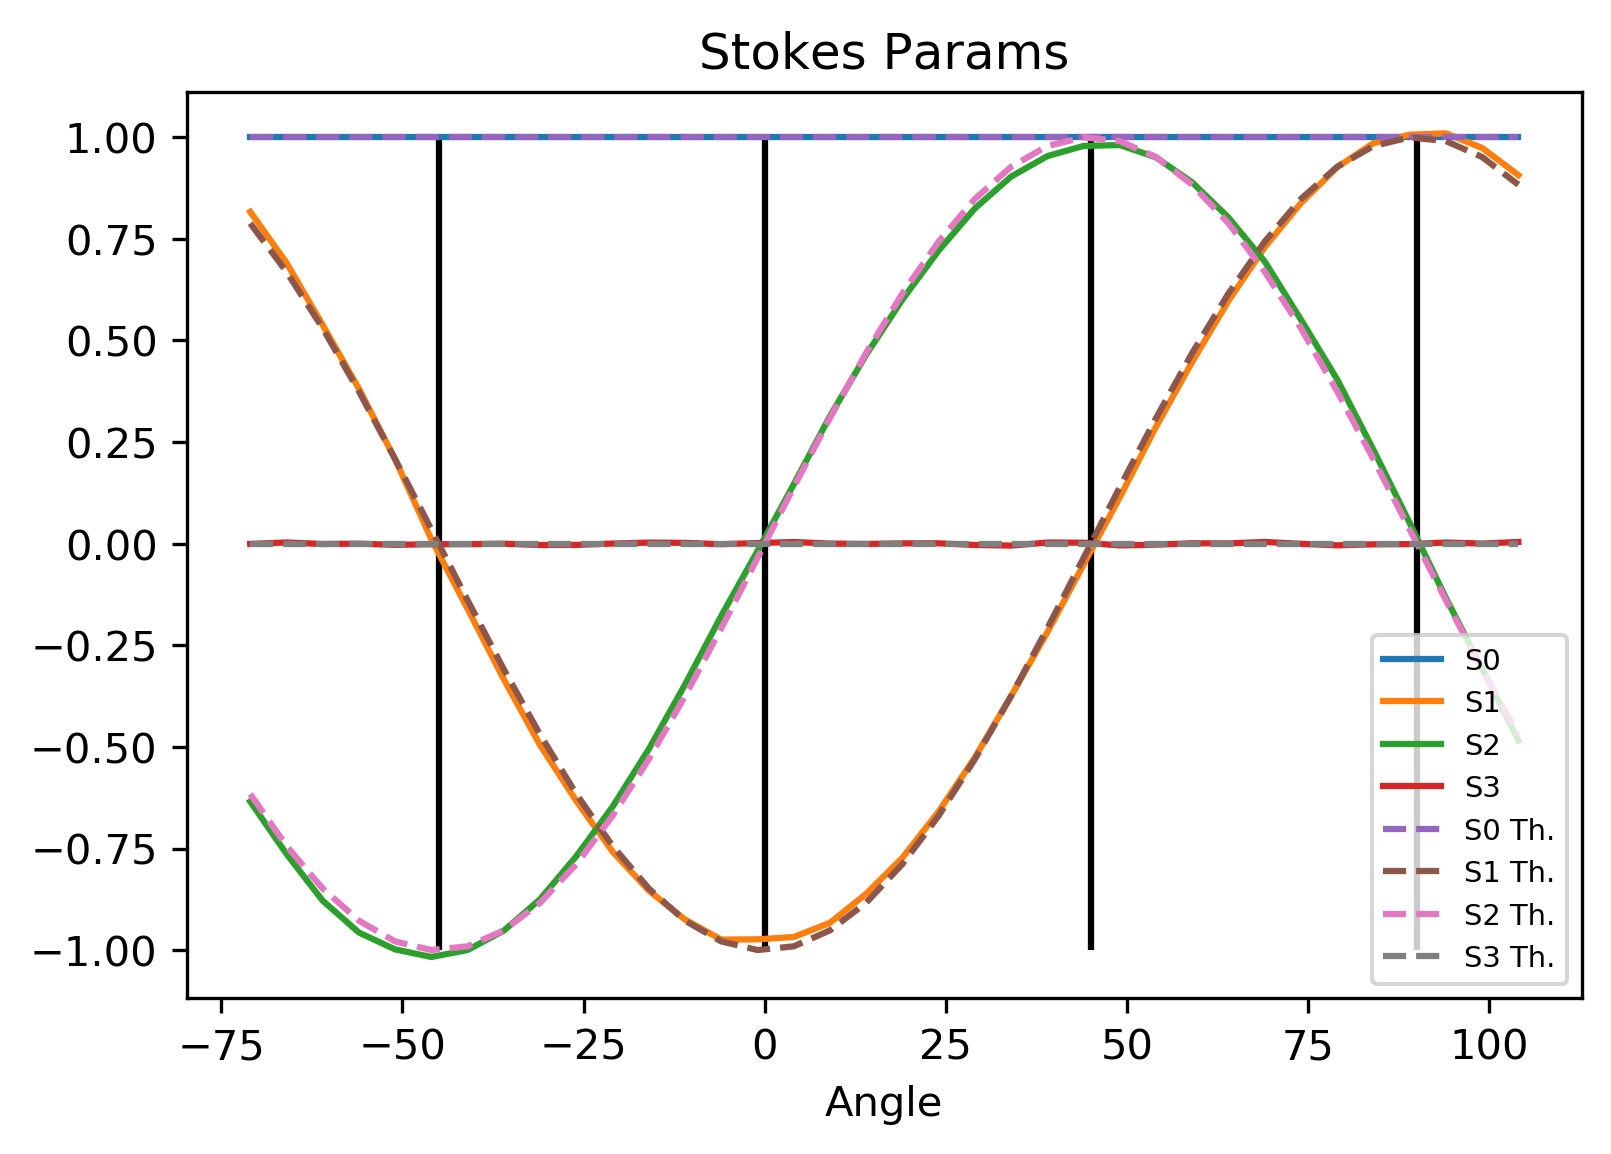

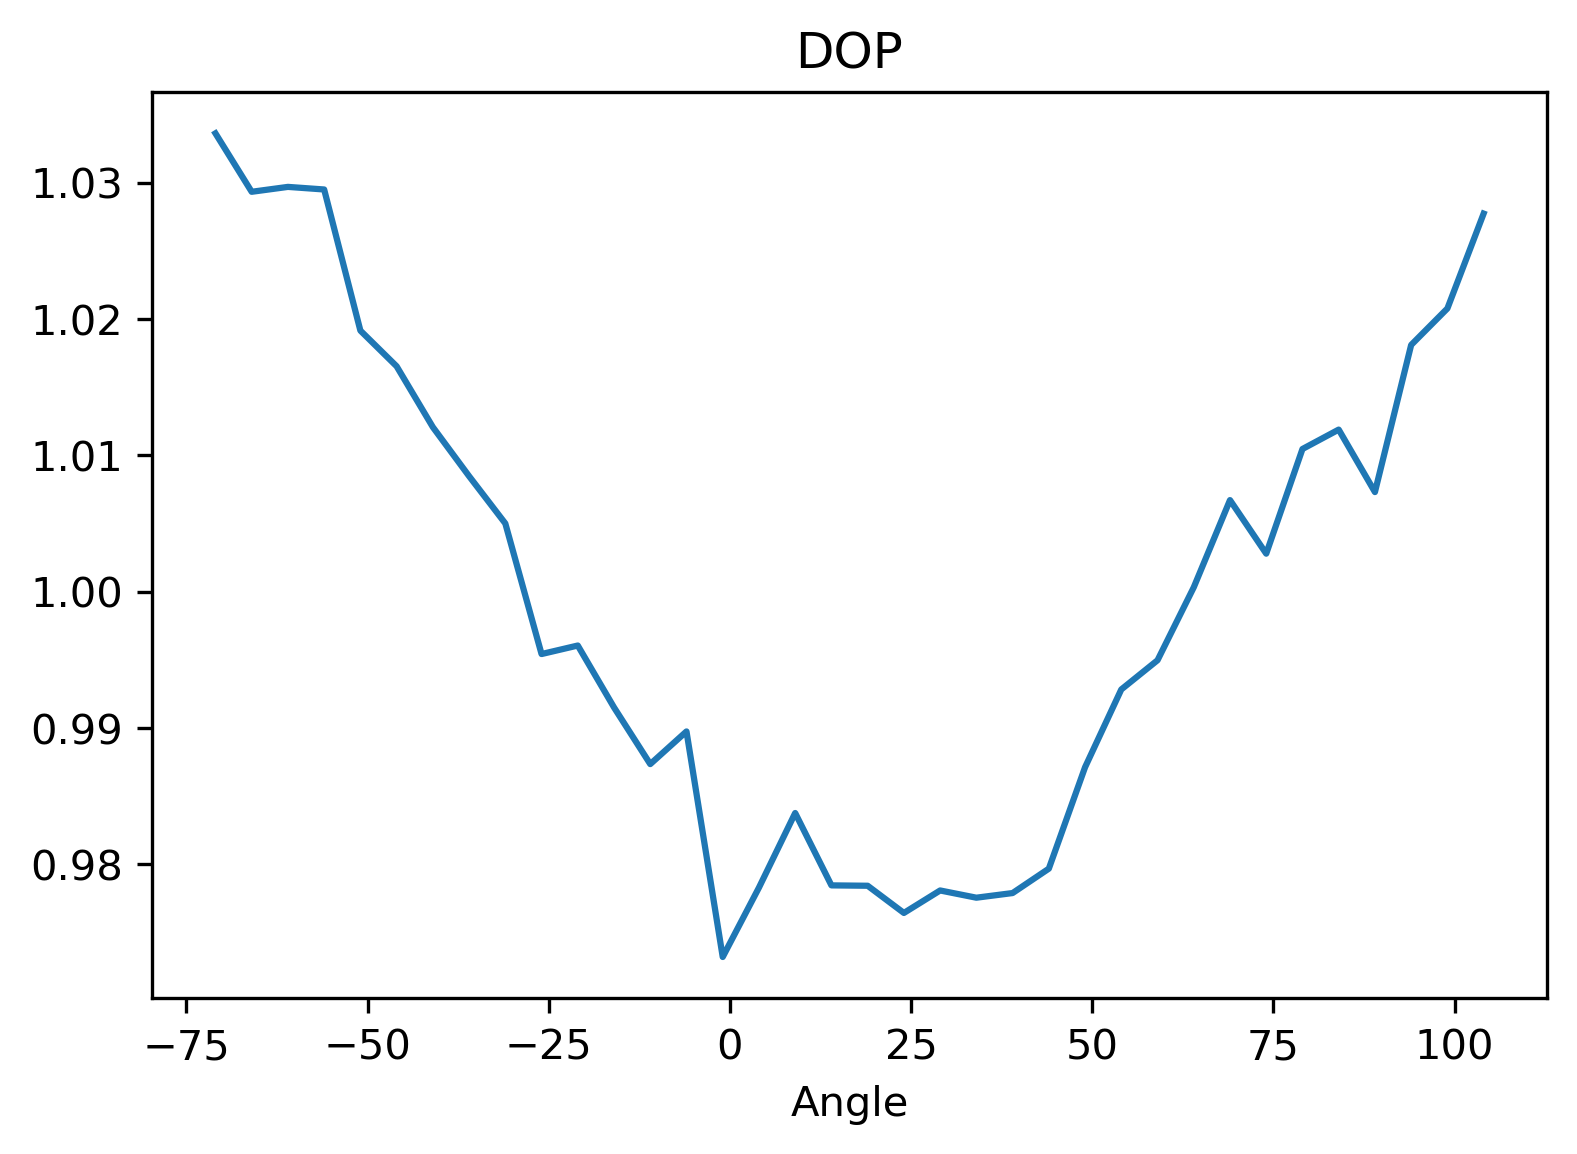

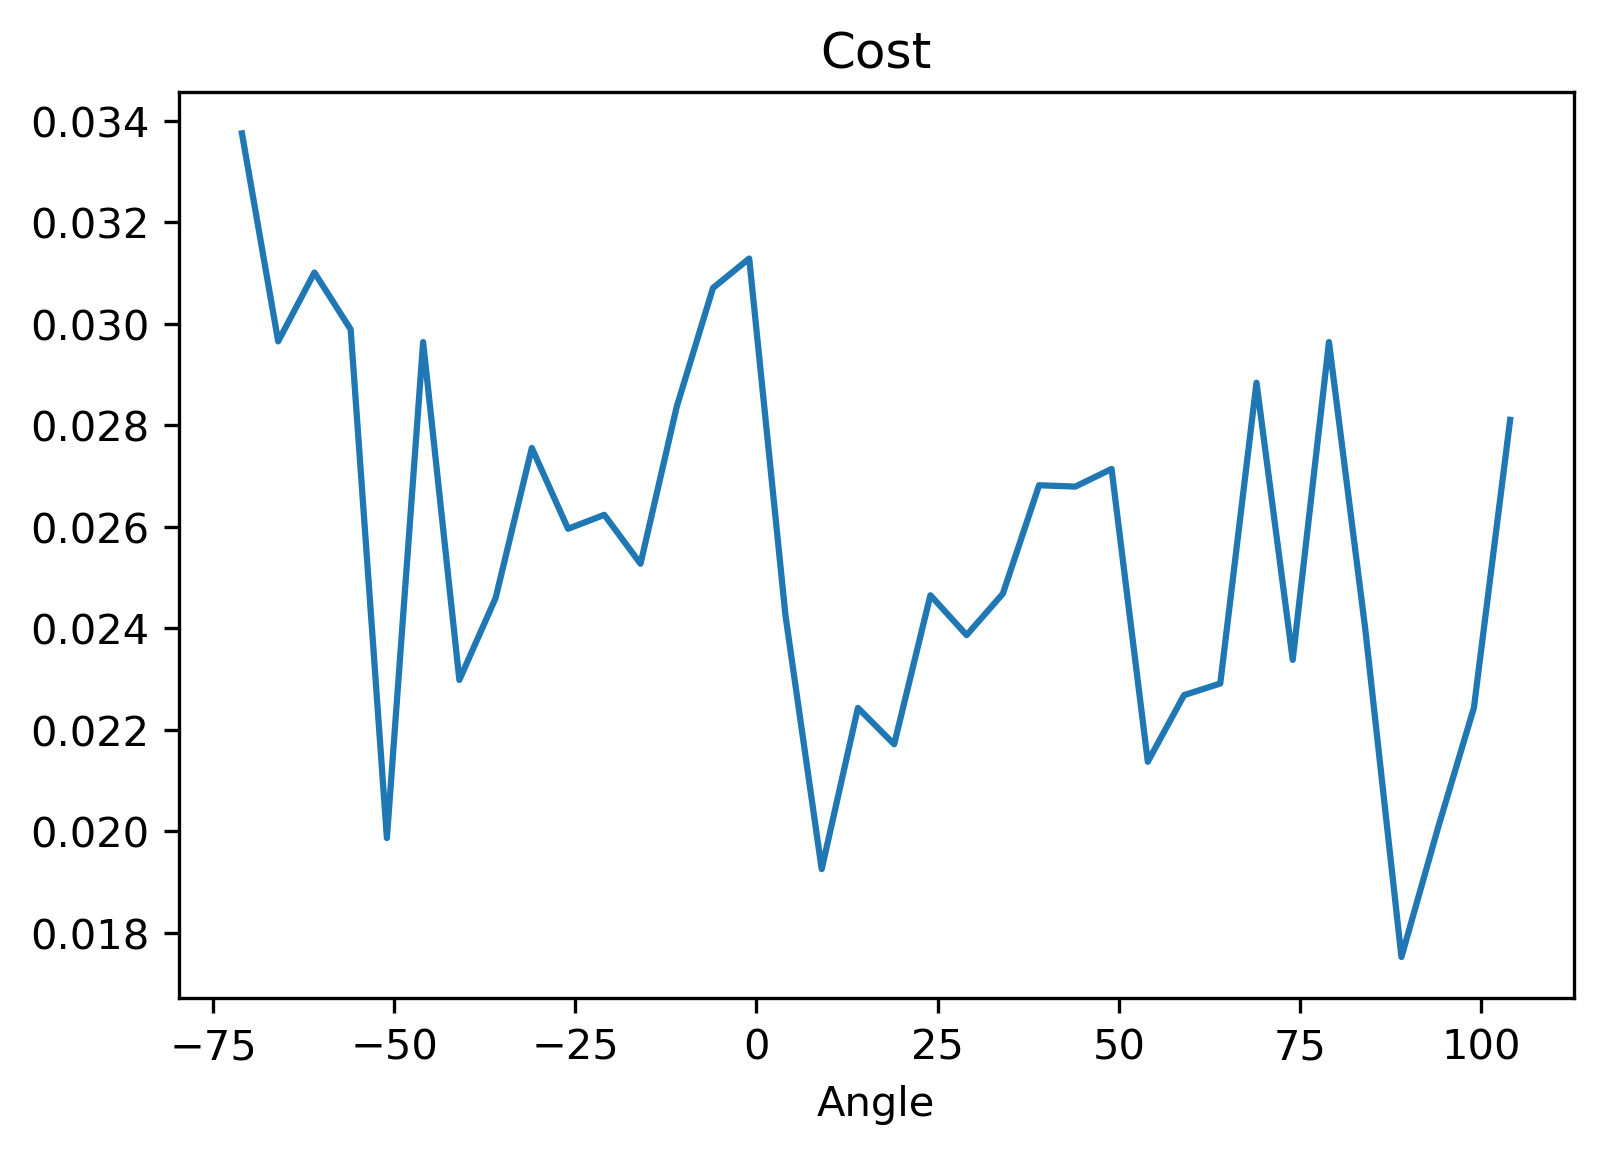

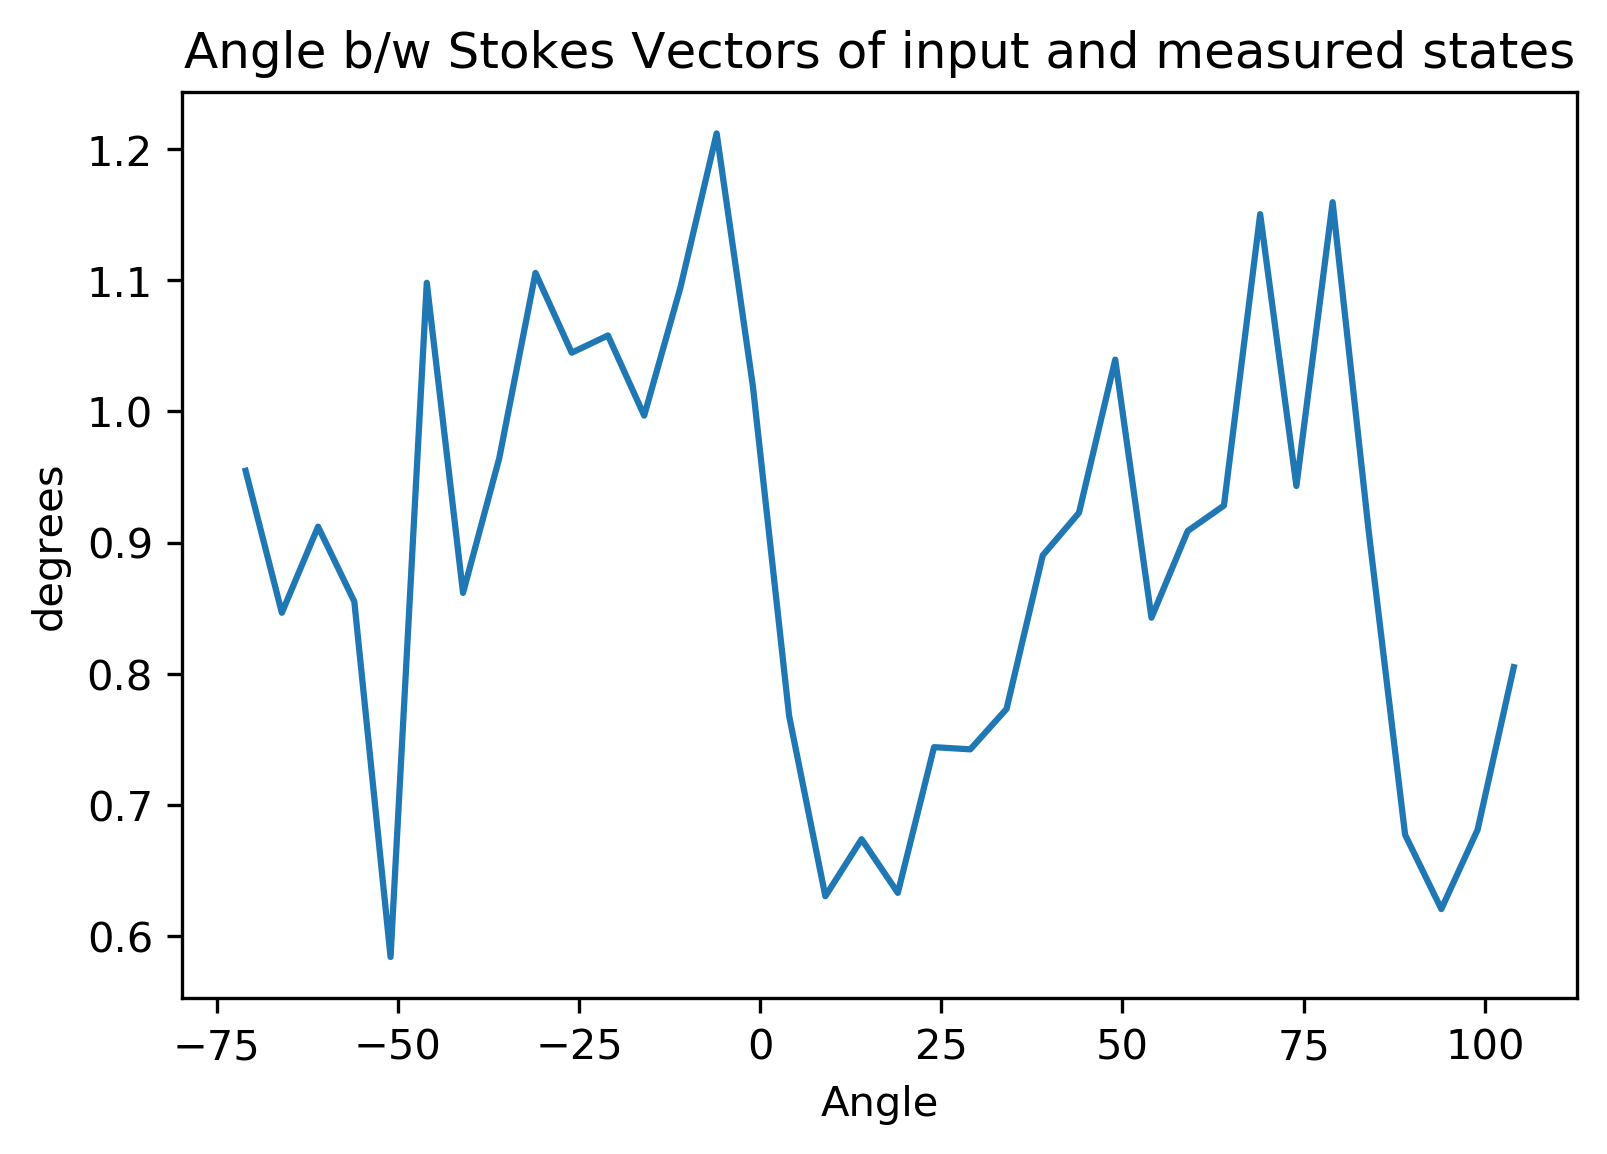

In [242]:
avgArr, avgDF = average180()
x = avgArr[:,1]
vStateArr = avgArr[:,2:]
mappedStates = []
for vState in vStateArr:
    mappedState = np.matmul(Binv, vState)
    mappedState = np.squeeze(np.asarray(mappedState))
    mappedStates.append(mappedState)


pStateArr = mappedStates
pStateArr = np.array(pStateArr)
normStates = normalize(pStateArr)
print(normStates[:,3])
#print(pStateArr)
#print(pStateArr[0])
z = x-vertical

THStates = angleToStokes(x)

'''
plt.figure(dpi=300)
for i in np.arange(0,4,1):
    plt.plot(z,pStateArr[:,i], label = "S{0}".format(i))
plt.title("Stokes Params")
plt.xlabel("Angle")
plt.vlines([0, 45], -300, 300)
plt.legend(bbox_to_anchor=(1.1, 1))
#plt.savefig("CalibratedStokesPsuedoInverseParam.png", bbox_inches='tight')
'''

plt.figure(dpi=300)
for i in np.arange(0,4,1):
    plt.plot(z,normStates[:,i], label = "S{0}".format(i))
for i in np.arange(0,4,1):
    plt.plot(z,THStates[:,i], "--", label = "S{0} Th.".format(i))
    
#plt.plot(z, -np.cos(2*z*np.pi/180), label = "S1 Th.")
#plt.plot(z, np.sin(2*z*np.pi/180), label = "S2 Th.")
plt.title("Stokes Params")
plt.xlabel("Angle")
plt.vlines([-45,0, 45, 90], -1, 1)
#plt.legend(bbox_to_anchor=(1.1, 1))
plt.legend(fontsize='x-small')
#plt.savefig("CalibratedStokesRectInstrMatrix.png", bbox_inches='tight')




plt.figure(dpi=300)
plt.title("DOP")
plt.xlabel("Angle")
#plt.ylim([0.5,1.5])
plt.plot(z,getDOP(normStates))
#plt.savefig("CalibratedStokesRectInstrMatrixDOP.png", bbox_inches='tight')

plt.figure(dpi=300)
plt.title("Cost")
plt.xlabel("Angle")
plt.plot(z,cost(normStates, angleToStokes(x)))
#plt.savefig("CalibratedStokesParamPsuedoInverseCost.png", bbox_inches='tight')
print(x)
plt.figure(dpi=300)
plt.title("Angle b/w Stokes Vectors of input and measured states")
plt.xlabel("Angle")
plt.ylabel('degrees')
plt.plot(z,angleDiff(normStates, angleToStokes(x)))
#plt.savefig("CalibratedStokesRectInstrMatrixngleDiff.png", bbox_inches='tight')



466.2454963289723
457.58217257054054
452.5129764022495
433.2689758319206
424.19683719260746
425.574423044245
434.0088729099196
425.5720607362853
433.7034745748795
437.41806226793653
454.89714889239224
463.46832325541


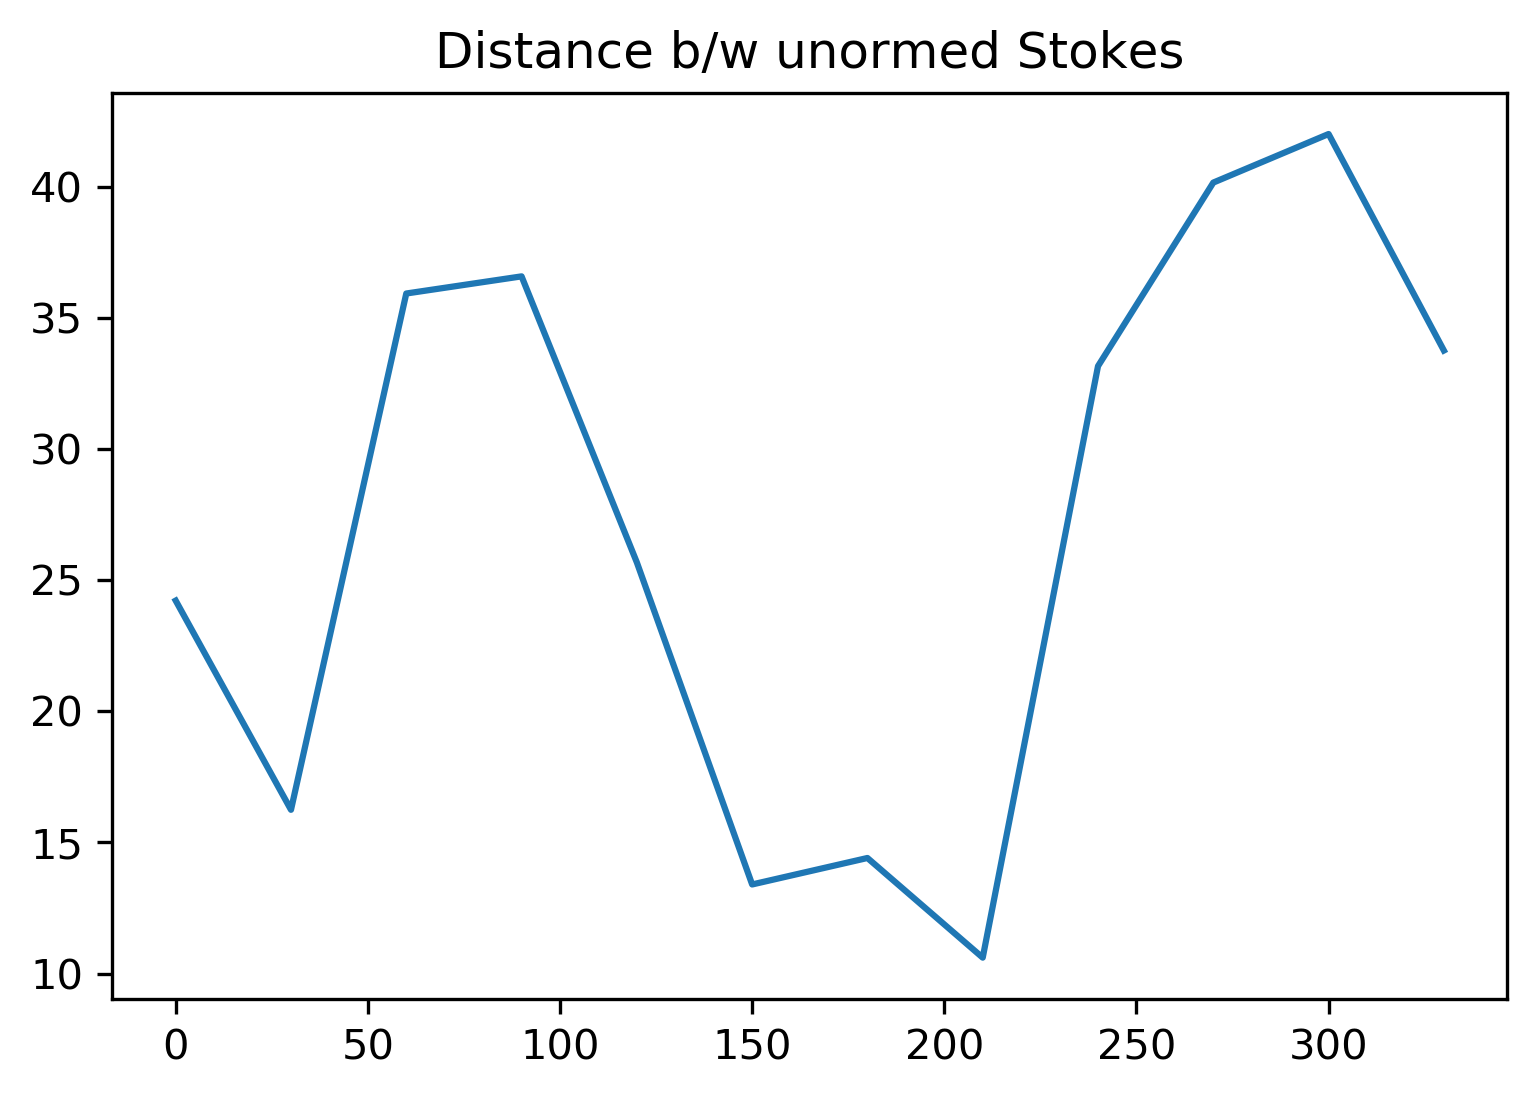

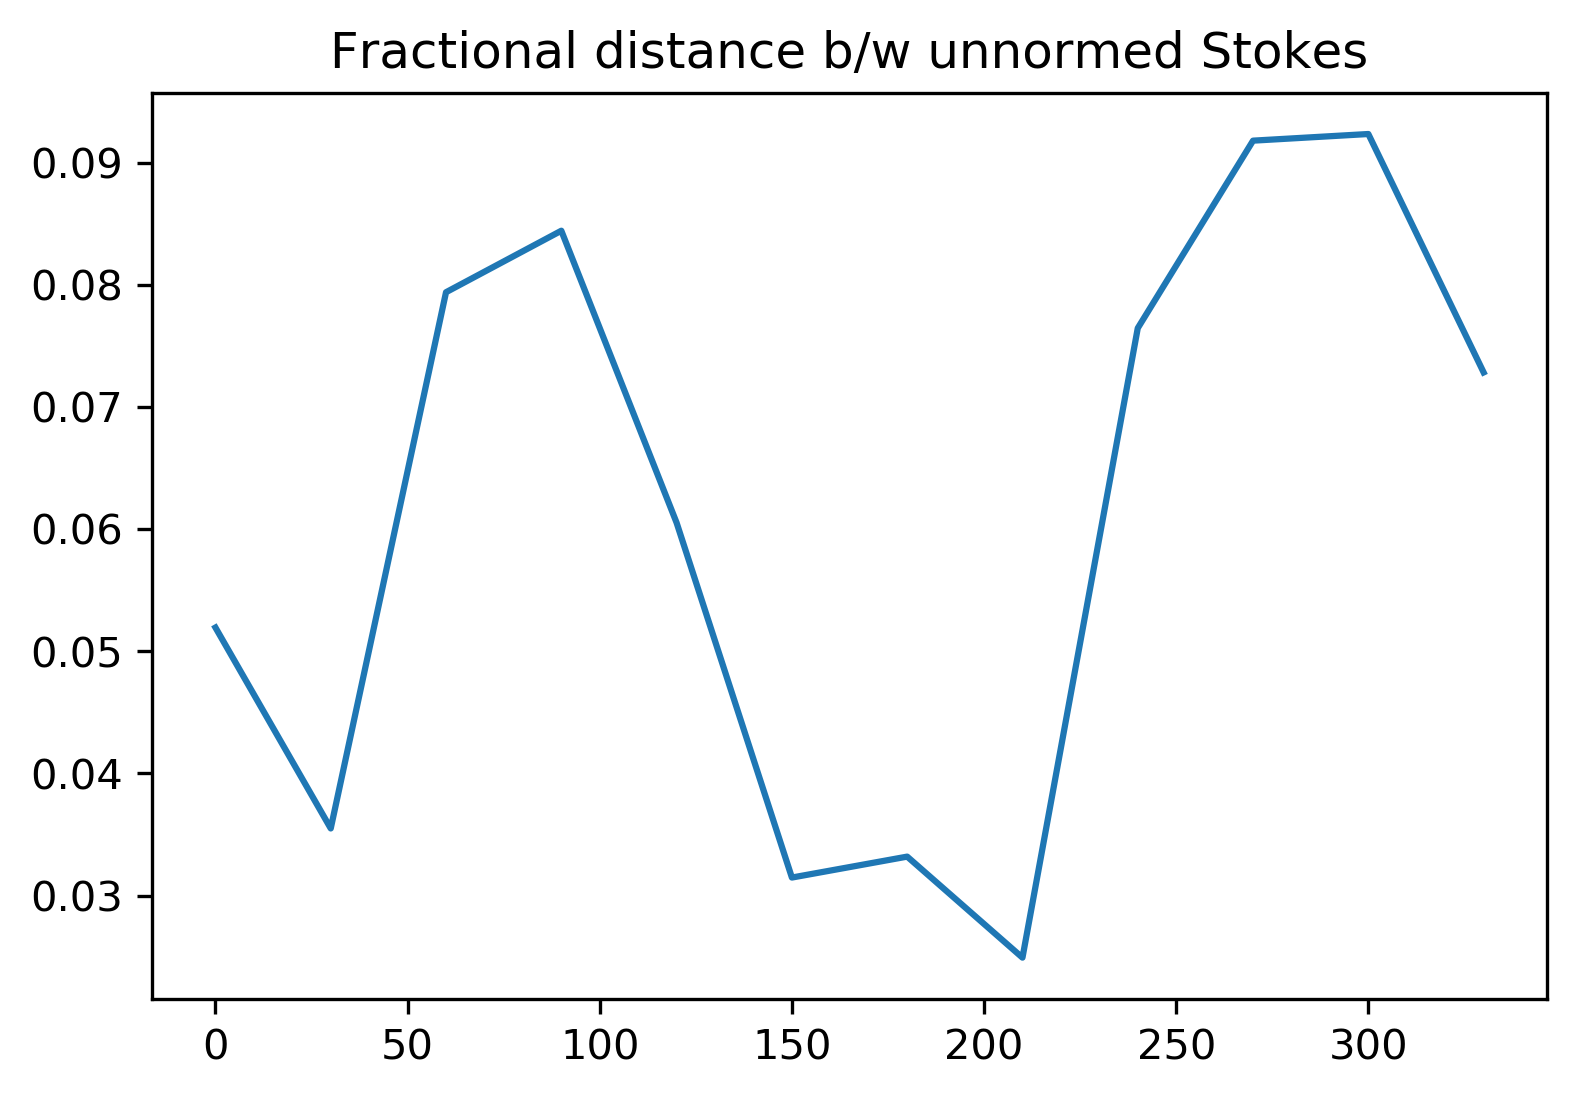

In [233]:
IAdjStatesArr = np.array([ np.append(angleToStokes(int(x[1]))*x[2],x[1]) for x in intensityArr ])
IAdjStates = IAdjStatesArr[:,0:-1]
Iangles = IAdjStatesArr[:,-1]
Iindicies = Iangles/6

dfI = pd.DataFrame(IAdjStatesArr, columns = ["S0", "S1", "S2", "S3", "Angle"])
VI = []
for angle in np.arange(0, 360,30):
    curdf = df.loc[df['Angle'] == angle]
    cur = curdf.to_numpy()
    VI.append(cur[0])
VI = np.array(VI)
vStateArr = VI[:,2:]
mappedStates = []
for vState in vStateArr:
    mappedState = np.matmul(Binv, vState)
    mappedState = np.squeeze(np.asarray(mappedState))
    mappedStates.append(mappedState)


pStateArr = mappedStates
pStateArr = np.array(pStateArr)
normStates = normalize(pStateArr)

#print(pStateArr)
#print(normStates)
plt.figure(dpi=300)
plt.title("Distance b/w unormed Stokes")
plt.plot(Iangles, cost(pStateArr, IAdjStates))


costArr = cost(pStateArr, IAdjStates)
for i in np.arange(0,len(pStateArr)):
    costArr[i] = costArr[i]/np.linalg.norm(pStateArr[i])
    print(np.linalg.norm(pStateArr[i]))
plt.figure(dpi=300)
plt.title("Fractional distance b/w unnormed Stokes")
plt.plot(Iangles, costArr)